# Playing games!

In this assignment your task is to make computer play games. Of course, we limit ourselves to a very limited subset of games: two players, zero sum, perfect information, deterministic games. These properties may require some explanation:

* *Two players* is pretty straightforward: there are exactly two players. Any less is a puzzle (see previous classes), any more is interesting (but out of scope).
* *Zero sum* means that a win of one player is necessarly a loss of the other player. For example, if one player wins the game having 100 points, the other player must have exactly -100 points.
* *Perfect information* means that there are no hidden variables in the game, like some cards kept in secret by players. Both players can see exactly the same thing.
* *Deterministic* means that there is no randomness in the game, no dices, no decks of cards, etc.

Each and every of these assumptions can be relaxed, yielding a more complex variant of the problem of playing games.

## Game

We begin by defining a general class `Game`, equipped with 7 functions:

* `initial_state` returns a representation of an intial state of the game, e.g., an empty board and an information which player plays first. State is opaque to search algorithms, similarly as in the classes on Agents and A*.
* `player` return the id of a player to make a move in the given `state`. Here we consistently use number 1 to represent the first player and 2 to represent the second player, but in general any two distict identifiers would suffice.
* `actions` returns a list of valid moves in the given state. This corresponds to the list of available actions in previous classes.
* `result` returns a new state after performing the given `action` in the given `state`. This is the transition model underpinning the game.
* `is_terminal` returns `True` if the given `state` is a terminal node in the search tree, i.e., either one of the players won or it is a draw. This is a leaf in a search tree and no further actions can be executed.
* `utility` can be called only for a terminal `state` and returns a numeric representation of how good this state is for the given `player`. Because we are considering zero-sum games it is always true that `utility(state, 1) = -utility(state, 2)`
* `print_state` is a helper function to pretty-print the given `state` to the standard output. As the representation is opaque and possibly hard to read for a human, this little function will make our lives much easier further down the line.

In [1]:
class Game:
    @property
    def initial_state(self):
        ...
        return state
    
    def player(self, state):
        ...
        return playerno
        
    def actions(self, state):
        ...
        return actions
        
    def result(self, state, action):
        ...
        return new_state
        
    def is_terminal(self, state):
        ...
        return boolean
        
    def utility(self, state, player):
        ...        
        return number
        
    def print_state(self, state):
        ...        

For convenience we define a simple function `opponent` that, given a player id, returns the id of the other player.

In [2]:
def opponent(player):    
    assert player in {1, 2}
    if player == 1:
        return 2
    else:
        return 1

## Tic-Tac-Toe

The first game we'll consider is *Tic-Tac-Toe* (*noughts and crosses*) in its bare minimum. For completeness, let me quote [Wikipedia](https://en.wikipedia.org/w/index.php?title=Tic-tac-toe&oldid=986503204) on rules: 

> Tic-tac-toe (American English), noughts and crosses (Commonwealth English), or Xs and Os, is a paper-and-pencil game for two players, X and O, who take turns marking the spaces in a 3×3 grid. The player who succeeds in placing three of their marks in a horizontal, vertical, or diagonal row is the winner. It is a solved game with a forced draw assuming best play from both players.

In [3]:
class TicTacToe(Game):    
    @property
    def initial_state(self):
        return (1, (0,)*9)
    
    def player(self, state):
        return state[0]
        
    def actions(self, state):
        return [i for i, v in enumerate(state[1]) if v == 0]
        
    def result(self, state, action):
        board = state[1]
        assert board[action] == 0
        assert state[0] in {1, 2}
        board = board[:action] + (state[0],) + board[action+1:]
        next_player = opponent(state[0])        
        return (next_player, board)
        
    def _has_line(self, state, player):
        board = state[1]
        for i in [0, 3, 6]:
            if board[i] == board[i+1] == board[i+2] == player:
                return True
        for i in [0, 1, 2]:
            if board[i] == board[i+3] == board[i+6] == player:
                return True
        if board[0] == board[3+1] == board[2*3+2] == player:
            return True
        if board[2] == board[3+1] == board[2*3] == player:
            return True
        return False
        
    def is_terminal(self, state):
        if all([v != 0 for v in state[1]]):
            return True
        return self._has_line(state, 1) or self._has_line(state, 2)
    
    def utility(self, state, player):
        assert player in {1, 2}
        mine = self._has_line(state, player)
        opponents = self._has_line(state, opponent(player))

        ### MODIFICATION ###
        # This extension takes into account the amount of turns
        # We should ensure that the sum of utilities of two
        # players sum up to one, thus we take the amount of turns of
        # one specific player, e.g. 1st:

        if mine and not opponents:
            return 100 - len(list(filter(lambda x: x == 1, state[1])))
        if not mine and opponents:
            return -100 + len(list(filter(lambda x: x == 1, state[1])))
        return 0    
    
    def print_state(self, state):
        print("Player making move", " OX"[state[0]])
        board = ["_OX"[v] for v in state[1]]
        print(*board[0:3])
        print(*board[3:6])
        print(*board[6:9])

The actions are represented by the number of field where to put a mark, using the following map:

```
0|1|2
-----
3|4|5
-----
6|7|8
```

The cell below executes a sequence of actions that leads to a draw.

In [4]:
game = TicTacToe()
state = game.initial_state
game.print_state(state)

for action in [4,0,6,2,1,7,5,3,8]:
    assert action in game.actions(state)
    assert not game.is_terminal(state)
    state = game.result(state, action)
    game.print_state(state)
    
print("Reached terminal state?", game.is_terminal(state))
print("Utility for the 1st player", game.utility(state, 1))
print("Utility for the 2nd player", game.utility(state, 2))

Player making move O
_ _ _
_ _ _
_ _ _
Player making move X
_ _ _
_ O _
_ _ _
Player making move O
X _ _
_ O _
_ _ _
Player making move X
X _ _
_ O _
O _ _
Player making move O
X _ X
_ O _
O _ _
Player making move X
X O X
_ O _
O _ _
Player making move O
X O X
_ O _
O X _
Player making move X
X O X
_ O O
O X _
Player making move O
X O X
X O O
O X _
Player making move X
X O X
X O O
O X O
Reached terminal state? True
Utility for the 1st player 0
Utility for the 2nd player 0


Below, 2 plays suboptimally and loses.

In [5]:
game = TicTacToe()
state = game.initial_state
game.print_state(state)

for action in [4,0,6,2,1,8,7]:
    assert action in game.actions(state)
    assert not game.is_terminal(state)
    state = game.result(state, action)
    game.print_state(state)
    
print("Reached terminal state?", game.is_terminal(state))
print("Utility for the 1st player", game.utility(state, 1))
print("Utility for the 2nd player", game.utility(state, 2))

Player making move O
_ _ _
_ _ _
_ _ _
Player making move X
_ _ _
_ O _
_ _ _
Player making move O
X _ _
_ O _
_ _ _
Player making move X
X _ _
_ O _
O _ _
Player making move O
X _ X
_ O _
O _ _
Player making move X
X O X
_ O _
O _ _
Player making move O
X O X
_ O _
O _ X
Player making move X
X O X
_ O _
O O X
Reached terminal state? True
Utility for the 1st player 96
Utility for the 2nd player -96


Finally, in the cell below 1 plays suboptimally and loses.

In [6]:
game = TicTacToe()
state = game.initial_state
game.print_state(state)

for action in [2,4,6,0,7,8]:
    assert action in game.actions(state)
    assert not game.is_terminal(state)
    state = game.result(state, action)
    game.print_state(state)
    
print("Reached terminal state?", game.is_terminal(state))
print("Utility for the 1st player", game.utility(state, 1))
print("Utility for the 2nd player", game.utility(state, 2))

Player making move O
_ _ _
_ _ _
_ _ _
Player making move X
_ _ O
_ _ _
_ _ _
Player making move O
_ _ O
_ X _
_ _ _
Player making move X
_ _ O
_ X _
O _ _
Player making move O
X _ O
_ X _
O _ _
Player making move X
X _ O
_ X _
O O _
Player making move O
X _ O
_ X _
O O X
Reached terminal state? True
Utility for the 1st player -97
Utility for the 2nd player 97


## A judge and a dummy

Lets define a common interface for a player: it is a callable (e.g., a function) receiving two arguments: 

1. The definition of a game as an object of the class `Game`
2. A current state in which a move is to be made.

The following function `dummy` follows this interface. It represents a player that always makes the first available move.

In [7]:
def dummy(game, state):
    return game.actions(state)[0]

To test players it is convenient to construct a general judge with three parameters:

* `game` A definition of a game of type `Game`.
* `player1` A callable following the interface described above representing the first player.
* `player2` A callable following the interface described above representing the second player.

In [8]:
def judge(game: Game, player1, player2):    
    state = game.initial_state

    while not game.is_terminal(state):
        if game.player(state) == 1:
            action = player1(game, state)
        else:
            action = player2(game, state)        
        game.print_state(state)
        print("Action:", action)
        print()
        state = game.result(state, action)

    game.print_state(state)
    print("Reached terminal state?", game.is_terminal(state))
    u1 = game.utility(state, 1)
    u2 = game.utility(state, 2)
    print("Utility for the 1st player", u1)
    print("Utility for the 2nd player", u2)
    if u1 > u2:
        print("Winner: 1st player")
    elif u1 < u2:
        print("Winner: 2nd player")
    else:
        print("Draw")

Lets see how well two dummies compete against each other in the game of Tic-Tac-Toe.

In [9]:
judge(TicTacToe(), dummy, dummy)

Player making move O
_ _ _
_ _ _
_ _ _
Action: 0

Player making move X
O _ _
_ _ _
_ _ _
Action: 1

Player making move O
O X _
_ _ _
_ _ _
Action: 2

Player making move X
O X O
_ _ _
_ _ _
Action: 3

Player making move O
O X O
X _ _
_ _ _
Action: 4

Player making move X
O X O
X O _
_ _ _
Action: 5

Player making move O
O X O
X O X
_ _ _
Action: 6

Player making move X
O X O
X O X
O _ _
Reached terminal state? True
Utility for the 1st player 96
Utility for the 2nd player -96
Winner: 1st player


## Task 1: Minimax algorithm

Complete the following cell with an implementation of the mini-max algorithm. 
The function should follow the interface for a player described above and return the best move to be made in the given `state` under the rules defined by the `game`.

In [10]:
def max_value(game: Game, state, player_to_win):
    # If the game ends, return the utility
    # for the current player
    if game.is_terminal(state):
        return game.utility(state, player_to_win), None
    
    # For choosing the best action
    best_utility = -float('inf')
    best_move = None

    # Choose the best action (the greatest utility)
    for action in game.actions(state):
        utility, _ = min_value(game, game.result(state, action), player_to_win)

        if best_utility < utility:
            best_utility = utility
            best_move = action

    return best_utility, best_move

def min_value(game: Game, state, player_to_win):
    # It the game ends, return the utility
    # for the current player
    if game.is_terminal(state):
        return game.utility(state, player_to_win), None
    
    # For choosing the best action
    best_utility = float('inf')
    best_move = None

    # Choose the best action (the least utility)
    for action in game.actions(state):
        utility, _ = max_value(game, game.result(state, action), player_to_win)

        if best_utility > utility:
            best_utility = utility
            best_move = action

    return best_utility, best_move

def minimax(game: Game, state):
    player = game.player(state)
    _, move = max_value(game, state, player)

    return move

Lets test your implementation against dummy and against itself. It should always win with dummy (dummy is deterministic and suboptimal) and it should draw with itself (Tic-Tac-Toe is a solved game and draw is the best outcome for optimal players).
We prefix the calls to `judge` with `%time` to measure time spent in the call. This will be useful to compare the performance of minimax with alpha-beta.

In [11]:
%time judge(TicTacToe(), minimax, dummy)

Player making move O
_ _ _
_ _ _
_ _ _
Action: 0

Player making move X
O _ _
_ _ _
_ _ _
Action: 1

Player making move O
O X _
_ _ _
_ _ _
Action: 3

Player making move X
O X _
O _ _
_ _ _
Action: 2

Player making move O
O X X
O _ _
_ _ _
Action: 6

Player making move X
O X X
O _ _
O _ _
Reached terminal state? True
Utility for the 1st player 97
Utility for the 2nd player -97
Winner: 1st player
CPU times: user 1.37 s, sys: 2.91 ms, total: 1.37 s
Wall time: 1.38 s


In [12]:
%time judge(TicTacToe(), dummy, minimax)

Player making move O
_ _ _
_ _ _
_ _ _
Action: 0

Player making move X
O _ _
_ _ _
_ _ _
Action: 4

Player making move O
O _ _
_ X _
_ _ _
Action: 1

Player making move X
O O _
_ X _
_ _ _
Action: 2

Player making move O
O O X
_ X _
_ _ _
Action: 3

Player making move X
O O X
O X _
_ _ _
Action: 6

Player making move O
O O X
O X _
X _ _
Reached terminal state? True
Utility for the 1st player -97
Utility for the 2nd player 97
Winner: 2nd player
CPU times: user 151 ms, sys: 224 µs, total: 152 ms
Wall time: 151 ms


In [13]:
%time judge(TicTacToe(), minimax, minimax)

Player making move O
_ _ _
_ _ _
_ _ _
Action: 0

Player making move X
O _ _
_ _ _
_ _ _
Action: 4

Player making move O
O _ _
_ X _
_ _ _
Action: 1

Player making move X
O O _
_ X _
_ _ _
Action: 2

Player making move O
O O X
_ X _
_ _ _
Action: 6

Player making move X
O O X
_ X _
O _ _
Action: 3

Player making move O
O O X
X X _
O _ _
Action: 5

Player making move X
O O X
X X O
O _ _
Action: 7

Player making move O
O O X
X X O
O X _
Action: 8

Player making move X
O O X
X X O
O X O
Reached terminal state? True
Utility for the 1st player 0
Utility for the 2nd player 0
Draw
CPU times: user 1.47 s, sys: 201 µs, total: 1.47 s
Wall time: 1.47 s


## Task 2: Alpha-beta

Mini-max is an optimal solution, but not the most efficient. Complete the following cell of code implementing the alpha-beta algorithm.
The function should follow the interface for a player described above and return the best move to be made in the given `state` under the rules defined by the `game`.

In [14]:
def max_value_alpha_beta(game: Game, state, alpha, beta, player_to_win):
    # If the game ends, return the utility
    # for the current player
    if game.is_terminal(state):
        return game.utility(state, player_to_win), None
    
    # For choosing the best action
    best_utility = -float('inf')
    best_move = None

    # Choose the best action (the greatest utility)
    for action in game.actions(state):
        utility, _ = min_value_alpha_beta(game, game.result(state, action), alpha, beta, player_to_win)


        if best_utility < utility:
            best_utility = utility
            best_move = action

            # Update the alpha if needed,
            # i.e. the greatest utility for maximizer
            # found so far from the root to the node.
            alpha = max(alpha, best_utility)

        # If minimizer that is somewhere in the tree before the
        # current maximizer already found utility better for it,
        # so no sense to expand
        if beta <= best_utility:
            return best_utility, best_move

    return best_utility, best_move

def min_value_alpha_beta(game: Game, state, alpha, beta, player_to_win):
    # If the game ends, return the utility
    # for the current player
    if game.is_terminal(state):
        return game.utility(state, player_to_win), None
    
    # For choosing the best action
    best_utility = float('inf')
    best_move = None

    # Choose the best action (the least utility)
    for action in game.actions(state):
        utility, _ = max_value_alpha_beta(game, game.result(state, action), alpha, beta, player_to_win)


        if best_utility > utility:
            best_utility = utility
            best_move = action

            # Update the beta if needed,
            # i.e. the leats utility for minimizer
            # found so far from the root to the node.
            beta = min(beta, best_utility)

        # If maximizer that is somewhere in the tree before the
        # current minimizer already found utility better for it,
        # so no sense to expand
        if alpha >= best_utility:
            return best_utility, best_move

    return best_utility, best_move

def alphabeta(game: Game, state):
    player = game.player(state)
    _, move = max_value_alpha_beta(game, state, -float('inf'), float('inf'), player)

    return move

Again, lets test your implementation against dummy and against itself. It should behave in exactly the same way as minimax, but be faster.

In [39]:
%time judge(TicTacToe(), alphabeta, dummy)

Player making move O
_ _ _
_ _ _
_ _ _
Action: 0

Player making move X
O _ _
_ _ _
_ _ _
Action: 1

Player making move O
O X _
_ _ _
_ _ _
Action: 3

Player making move X
O X _
O _ _
_ _ _
Action: 2

Player making move O
O X X
O _ _
_ _ _
Action: 6

Player making move X
O X X
O _ _
O _ _
Reached terminal state? True
Utility for the 1st player 97
Utility for the 2nd player -97
Winner: 1st player
CPU times: user 62.5 ms, sys: 20 µs, total: 62.5 ms
Wall time: 61.6 ms


In [40]:
%time judge(TicTacToe(), dummy, alphabeta)

Player making move O
_ _ _
_ _ _
_ _ _
Action: 0

Player making move X
O _ _
_ _ _
_ _ _
Action: 4

Player making move O
O _ _
_ X _
_ _ _
Action: 1

Player making move X
O O _
_ X _
_ _ _
Action: 2

Player making move O
O O X
_ X _
_ _ _
Action: 3

Player making move X
O O X
O X _
_ _ _
Action: 6

Player making move O
O O X
O X _
X _ _
Reached terminal state? True
Utility for the 1st player -97
Utility for the 2nd player 97
Winner: 2nd player
CPU times: user 8.93 ms, sys: 0 ns, total: 8.93 ms
Wall time: 8.4 ms


In [41]:
%time judge(TicTacToe(), alphabeta, alphabeta)

Player making move O
_ _ _
_ _ _
_ _ _
Action: 0

Player making move X
O _ _
_ _ _
_ _ _
Action: 4

Player making move O
O _ _
_ X _
_ _ _
Action: 1

Player making move X
O O _
_ X _
_ _ _
Action: 2

Player making move O
O O X
_ X _
_ _ _
Action: 6

Player making move X
O O X
_ X _
O _ _
Action: 3

Player making move O
O O X
X X _
O _ _
Action: 5

Player making move X
O O X
X X O
O _ _
Action: 7

Player making move O
O O X
X X O
O X _
Action: 8

Player making move X
O O X
X X O
O X O
Reached terminal state? True
Utility for the 1st player 0
Utility for the 2nd player 0
Draw
CPU times: user 71.7 ms, sys: 0 ns, total: 71.7 ms
Wall time: 70.6 ms


## Migration

The following cell defines the rules for the game Migration. See https://www.di.fc.ul.pt/~jpn/gv/migration.htm for a complete description of rules. This implementation is somewhat more flexible: instead of using a board of fixed size, the size of a board is defined by the constructor parameter `n`. The first player that cannot move loses.

In [42]:
import math

class Migration:
    def __init__(self, n):
        self.n = n
    
    @property
    def initial_state(self):
        board = [[0]*self.n for _ in range(self.n)]
        k = math.ceil(self.n/2 - 1)
        for y in range(k):
            for x in range(y + 1, self.n - y - 1):
                board[x][y] = 1    
        for x in range(k):
            for y in range(x + 1, self.n - x - 1):
                board[self.n - x - 1][y] = 2
        board = tuple((tuple(row) for row in board))
        return (1, board)
    
    def player(self, state):
        return state[0]
    
    def _is_valid(self, x, y):
        return 0 <= x < self.n and 0 <= y < self.n
    
    def actions(self, state):
        board = state[1]
        player = self.player(state)
        opp = opponent(player)
        if player == 1:
            dx, dy = 0, 1
        else:
            assert player == 2
            dx, dy = -1, 0
        actions = []
        for x in range(self.n):
            nx = x + dx
            for y in range(self.n):
                ny = y + dy
                if board[x][y] == player and self._is_valid(nx, ny) and board[nx][ny] == 0:
                    actions.append((x, y, nx, ny))
        return actions
    
    def result(self, state, action):
        x, y, nx, ny = action
        player, board = state
        board = [list(row) for row in board]
        assert board[x][y] == player
        assert board[nx][ny] == 0
        board[x][y] = 0
        board[nx][ny] = player
        board = tuple((tuple(row) for row in board))
        return (opponent(player), board)
    
    def is_terminal(self, state):
        return len(self.actions(state)) == 0
        
    def utility(self, state, player):
        assert self.is_terminal(state)
        if self.player(state) == player:
            return -1
        else:
            return 1
        
    def print_state(self, state):
        print("Player making move", "_\u25CB\u25CF"[state[0]])
        for row in state[1]:
            print(*["_\u25CB\u25CF"[v] for v in row]) 

Let's first see the initial state.

In [43]:
game = Migration(8)
state = game.initial_state
game.print_state(state)

Player making move ○
_ _ _ _ _ _ _ _
○ _ _ _ _ _ _ _
○ ○ _ _ _ _ _ _
○ ○ ○ _ _ _ _ _
○ ○ ○ _ _ _ _ _
○ ○ _ ● ● _ _ _
○ _ ● ● ● ● _ _
_ ● ● ● ● ● ● _


Now, white makes a move.

In [44]:
move = game.actions(state)[0]
state = game.result(state, move)
game.print_state(state)

Player making move ●
_ _ _ _ _ _ _ _
_ ○ _ _ _ _ _ _
○ ○ _ _ _ _ _ _
○ ○ ○ _ _ _ _ _
○ ○ ○ _ _ _ _ _
○ ○ _ ● ● _ _ _
○ _ ● ● ● ● _ _
_ ● ● ● ● ● ● _


As this is a turn-taking game, now it is time for black.

In [45]:
move = game.actions(state)[5]
state = game.result(state, move)
game.print_state(state)

Player making move ○
_ _ _ _ _ _ _ _
_ ○ _ _ _ _ _ _
○ ○ _ _ _ _ _ _
○ ○ ○ _ _ _ _ _
○ ○ ○ _ _ _ _ _
○ ○ _ ● ● _ _ _
○ _ ● ● ● ● ● _
_ ● ● ● ● ● _ _


Let's see how well alpha-beta fares on a $4 \times 4$ board. The following cell should terminate within a few seconds.

In [46]:
judge(Migration(4), alphabeta, alphabeta)

Player making move ○
_ _ _ _
○ _ _ _
○ _ _ _
_ ● ● _
Action: (1, 0, 1, 1)

Player making move ●
_ _ _ _
_ ○ _ _
○ _ _ _
_ ● ● _
Action: (3, 1, 2, 1)

Player making move ○
_ _ _ _
_ ○ _ _
○ ● _ _
_ _ ● _
Action: (1, 1, 1, 2)

Player making move ●
_ _ _ _
_ _ ○ _
○ ● _ _
_ _ ● _
Action: (2, 1, 1, 1)

Player making move ○
_ _ _ _
_ ● ○ _
○ _ _ _
_ _ ● _
Action: (1, 2, 1, 3)

Player making move ●
_ _ _ _
_ ● _ ○
○ _ _ _
_ _ ● _
Action: (1, 1, 0, 1)

Player making move ○
_ ● _ _
_ _ _ ○
○ _ _ _
_ _ ● _
Action: (2, 0, 2, 1)

Player making move ●
_ ● _ _
_ _ _ ○
_ ○ _ _
_ _ ● _
Action: (3, 2, 2, 2)

Player making move ○
_ ● _ _
_ _ _ ○
_ ○ ● _
_ _ _ _
Reached terminal state? True
Utility for the 1st player -1
Utility for the 2nd player 1
Winner: 2nd player


A $5 \times 5$ board is somewhat more challenging, but should still be within reach. The following cell should terminate within, say, 30 seconds at most.

In [47]:
%time judge(Migration(5), alphabeta, alphabeta)

Player making move ○
_ _ _ _ _
○ _ _ _ _
○ ○ _ _ _
○ _ ● _ _
_ ● ● ● _
Action: (2, 1, 2, 2)

Player making move ●
_ _ _ _ _
○ _ _ _ _
○ _ ○ _ _
○ _ ● _ _
_ ● ● ● _
Action: (4, 1, 3, 1)

Player making move ○
_ _ _ _ _
○ _ _ _ _
○ _ ○ _ _
○ ● ● _ _
_ _ ● ● _
Action: (1, 0, 1, 1)

Player making move ●
_ _ _ _ _
_ ○ _ _ _
○ _ ○ _ _
○ ● ● _ _
_ _ ● ● _
Action: (3, 1, 2, 1)

Player making move ○
_ _ _ _ _
_ ○ _ _ _
○ ● ○ _ _
○ _ ● _ _
_ _ ● ● _
Action: (1, 1, 1, 2)

Player making move ●
_ _ _ _ _
_ _ ○ _ _
○ ● ○ _ _
○ _ ● _ _
_ _ ● ● _
Action: (2, 1, 1, 1)

Player making move ○
_ _ _ _ _
_ ● ○ _ _
○ _ ○ _ _
○ _ ● _ _
_ _ ● ● _
Action: (1, 2, 1, 3)

Player making move ●
_ _ _ _ _
_ ● _ ○ _
○ _ ○ _ _
○ _ ● _ _
_ _ ● ● _
Action: (1, 1, 0, 1)

Player making move ○
_ ● _ _ _
_ _ _ ○ _
○ _ ○ _ _
○ _ ● _ _
_ _ ● ● _
Action: (1, 3, 1, 4)

Player making move ●
_ ● _ _ _
_ _ _ _ ○
○ _ ○ _ _
○ _ ● _ _
_ _ ● ● _
Action: (4, 3, 3, 3)

Player making move ○
_ ● _ _ _
_ _ _ _ ○
○ _ ○ _ _
○ _ ● ● _
_ _ ● _ _

It goes without saying that alpha-beta should beat the dummy. Each of the following two cells should terminate within 30 seconds, and alpha-beta should be the winner.

In [48]:
%time judge(Migration(5), alphabeta, dummy)

Player making move ○
_ _ _ _ _
○ _ _ _ _
○ ○ _ _ _
○ _ ● _ _
_ ● ● ● _
Action: (2, 1, 2, 2)

Player making move ●
_ _ _ _ _
○ _ _ _ _
○ _ ○ _ _
○ _ ● _ _
_ ● ● ● _
Action: (4, 1, 3, 1)

Player making move ○
_ _ _ _ _
○ _ _ _ _
○ _ ○ _ _
○ ● ● _ _
_ _ ● ● _
Action: (1, 0, 1, 1)

Player making move ●
_ _ _ _ _
_ ○ _ _ _
○ _ ○ _ _
○ ● ● _ _
_ _ ● ● _
Action: (3, 1, 2, 1)

Player making move ○
_ _ _ _ _
_ ○ _ _ _
○ ● ○ _ _
○ _ ● _ _
_ _ ● ● _
Action: (1, 1, 1, 2)

Player making move ●
_ _ _ _ _
_ _ ○ _ _
○ ● ○ _ _
○ _ ● _ _
_ _ ● ● _
Action: (2, 1, 1, 1)

Player making move ○
_ _ _ _ _
_ ● ○ _ _
○ _ ○ _ _
○ _ ● _ _
_ _ ● ● _
Action: (1, 2, 1, 3)

Player making move ●
_ _ _ _ _
_ ● _ ○ _
○ _ ○ _ _
○ _ ● _ _
_ _ ● ● _
Action: (1, 1, 0, 1)

Player making move ○
_ ● _ _ _
_ _ _ ○ _
○ _ ○ _ _
○ _ ● _ _
_ _ ● ● _
Action: (1, 3, 1, 4)

Player making move ●
_ ● _ _ _
_ _ _ _ ○
○ _ ○ _ _
○ _ ● _ _
_ _ ● ● _
Action: (4, 3, 3, 3)

Player making move ○
_ ● _ _ _
_ _ _ _ ○
○ _ ○ _ _
○ _ ● ● _
_ _ ● _ _

In [49]:
%time judge(Migration(5), dummy, alphabeta)

Player making move ○
_ _ _ _ _
○ _ _ _ _
○ ○ _ _ _
○ _ ● _ _
_ ● ● ● _
Action: (1, 0, 1, 1)

Player making move ●
_ _ _ _ _
_ ○ _ _ _
○ ○ _ _ _
○ _ ● _ _
_ ● ● ● _
Action: (3, 2, 2, 2)

Player making move ○
_ _ _ _ _
_ ○ _ _ _
○ ○ ● _ _
○ _ _ _ _
_ ● ● ● _
Action: (1, 1, 1, 2)

Player making move ●
_ _ _ _ _
_ _ ○ _ _
○ ○ ● _ _
○ _ _ _ _
_ ● ● ● _
Action: (4, 1, 3, 1)

Player making move ○
_ _ _ _ _
_ _ ○ _ _
○ ○ ● _ _
○ ● _ _ _
_ _ ● ● _
Action: (1, 2, 1, 3)

Player making move ●
_ _ _ _ _
_ _ _ ○ _
○ ○ ● _ _
○ ● _ _ _
_ _ ● ● _
Action: (2, 2, 1, 2)

Player making move ○
_ _ _ _ _
_ _ ● ○ _
○ ○ _ _ _
○ ● _ _ _
_ _ ● ● _
Action: (1, 3, 1, 4)

Player making move ●
_ _ _ _ _
_ _ ● _ ○
○ ○ _ _ _
○ ● _ _ _
_ _ ● ● _
Action: (1, 2, 0, 2)

Player making move ○
_ _ ● _ _
_ _ _ _ ○
○ ○ _ _ _
○ ● _ _ _
_ _ ● ● _
Action: (2, 1, 2, 2)

Player making move ●
_ _ ● _ _
_ _ _ _ ○
○ _ ○ _ _
○ ● _ _ _
_ _ ● ● _
Action: (3, 1, 2, 1)

Player making move ○
_ _ ● _ _
_ _ _ _ ○
○ ● ○ _ _
○ _ _ _ _
_ _ ● ● _

## Task 3: Alpha-beta with limited depth and heuristic evaluation

Alpha-beta is a complete and optimal algorithm, but still too slow.
In practice it is used as a heuristic algorithm: sometimes searching is terminated before reaching a terminal node and some heuristic evaluation of the reached non-terminal state is returned instead of the utility of a terminal state.
How to evaluate non-terminal states and how to decide when to terminate search is an extremely rich topic.

Complete the cells below:

* Implement the function `evaluate` in `MigrationWithHeuristic` such that it returns some evaluation of the given `state` from the point of view of the given `player`. The more promising the state for the player, the higher value should be returned.
* Implement the function `__call__` in `HeuristicAlphaBeta` such that it is an implementation of the alpha-beta algorithm, but should the recursion depth reach `self.max_depth` the heuristic evaluation should be returned instead of descending further in the game tree.

Minimax and alpha-beta are game-agnostic and thus for them states are opaque. On the other hand `evaluate` is not game-agnostic, but it is also not (strictly speaking) a part of the rules of a game. Still, it needs to access the internals of the state and in the provided implementation of `Migration` the state is a 2-tuple:

1. The id of a player to make a move
2. The representation of a board as a tuple of tuples, forming an `self.n` $\times$ `self.n` array. Each element of this tuple of tuples is either:
   * 0 - an empty cell
   * 1 - a stone of player 1
   * 2 - a stone of player 2

In [50]:
class MigrationWithHeuristic(Migration):
    def evaluate(self, state, player):
        # Heuristic considers amount of pieces the player
        # can move and the amount of blocked pieces of
        # the opponent

        pieces_to_move_player = len(self.actions((player, state[1])))
        pieces_to_move_opponent = len(self.actions((opponent(player), state[1])))

        return pieces_to_move_player - pieces_to_move_opponent

In [51]:
class HeuristicAlphaBeta:
    def __init__(self, max_depth):
        self.max_depth = max_depth

    def max_value_alpha_beta(self, game: Game, state, alpha, beta, player_to_win, depth = 0):
        # If the game ends, return the utility
        # for the current player
        if game.is_terminal(state):
            return game.utility(state, player_to_win), None
        
        # Evaluate instead if depth reached the limit
        if depth > self.max_depth:
            return game.evaluate(state, player_to_win), None
        
        # For choosing the best action
        best_utility = -float('inf')
        best_move = None

        # Choose the best action (the greatest utility)
        for action in game.actions(state):
            utility, _ = self.min_value_alpha_beta(game, game.result(state, action), alpha, beta, player_to_win, depth + 1)


            if best_utility < utility:
                best_utility = utility
                best_move = action

                # Update the alpha if needed,
                # i.e. the greatest utility for maximizer
                # found so far from the root to the node.
                alpha = max(alpha, best_utility)

            # If minimizer that is somewhere in the tree before the
            # current maximizer already found utility better for it,
            # so no sense to expand
            if beta <= best_utility:
                return best_utility, best_move

        return best_utility, best_move

    def min_value_alpha_beta(self, game: Game, state, alpha, beta, player_to_win, depth = 0):
        # If the game ends, return the utility
        # for the current player
        if game.is_terminal(state):
            return game.utility(state, player_to_win), None
        
        # Evaluate instead if depth reached the limit
        if depth > self.max_depth:
            return game.evaluate(state, player_to_win), None
        
        # For choosing the best action
        best_utility = float('inf')
        best_move = None

        # Choose the best action (the least utility)
        for action in game.actions(state):
            utility, _ = self.max_value_alpha_beta(game, game.result(state, action), alpha, beta, player_to_win, depth + 1)


            if best_utility > utility:
                best_utility = utility
                best_move = action

                # Update the beta if needed,
                # i.e. the leats utility for minimizer
                # found so far from the root to the node.
                beta = min(beta, best_utility)

            # If maximizer that is somewhere in the tree before the
            # current minimizer already found utility better for it,
            # so no sense to expand
            if alpha >= best_utility:
                return best_utility, best_move

        return best_utility, best_move

            
    def __call__(self, game: MigrationWithHeuristic, state):
        player = game.player(state)
        _, best_move = self.max_value_alpha_beta(game, state, -float('inf'), float('inf'), player)

        return best_move

## Task 4: Comparing alpha-beta and alpha-beta with heuristics

As you have seen $5\times 5$ board in this game is easy enough for alpha-beta, so we can use it to compare complete alpha-beta and alpha-beta with heuristics. Copy the next two cell a few times, and consider different depths for `HeuristicAlphaBeta`. Keep in mind that the game may be slightly unfair and thus you should always allow every player play in both positions before making conclusions. Afterwards, answer the question below the code cells.

In [69]:
%time judge(MigrationWithHeuristic(5), HeuristicAlphaBeta(8), alphabeta)

Player making move ○
_ _ _ _ _
○ _ _ _ _
○ ○ _ _ _
○ _ ● _ _
_ ● ● ● _
Action: (2, 1, 2, 2)

Player making move ●
_ _ _ _ _
○ _ _ _ _
○ _ ○ _ _
○ _ ● _ _
_ ● ● ● _
Action: (4, 1, 3, 1)

Player making move ○
_ _ _ _ _
○ _ _ _ _
○ _ ○ _ _
○ ● ● _ _
_ _ ● ● _
Action: (1, 0, 1, 1)

Player making move ●
_ _ _ _ _
_ ○ _ _ _
○ _ ○ _ _
○ ● ● _ _
_ _ ● ● _
Action: (3, 1, 2, 1)

Player making move ○
_ _ _ _ _
_ ○ _ _ _
○ ● ○ _ _
○ _ ● _ _
_ _ ● ● _
Action: (1, 1, 1, 2)

Player making move ●
_ _ _ _ _
_ _ ○ _ _
○ ● ○ _ _
○ _ ● _ _
_ _ ● ● _
Action: (2, 1, 1, 1)

Player making move ○
_ _ _ _ _
_ ● ○ _ _
○ _ ○ _ _
○ _ ● _ _
_ _ ● ● _
Action: (3, 0, 3, 1)

Player making move ●
_ _ _ _ _
_ ● ○ _ _
○ _ ○ _ _
_ ○ ● _ _
_ _ ● ● _
Action: (1, 1, 0, 1)

Player making move ○
_ ● _ _ _
_ _ ○ _ _
○ _ ○ _ _
_ ○ ● _ _
_ _ ● ● _
Action: (2, 2, 2, 3)

Player making move ●
_ ● _ _ _
_ _ ○ _ _
○ _ _ ○ _
_ ○ ● _ _
_ _ ● ● _
Action: (3, 2, 2, 2)

Player making move ○
_ ● _ _ _
_ _ ○ _ _
○ _ ● ○ _
_ ○ _ _ _
_ _ ● ● _

In [70]:
%time judge(MigrationWithHeuristic(5), HeuristicAlphaBeta(7), alphabeta)

Player making move ○
_ _ _ _ _
○ _ _ _ _
○ ○ _ _ _
○ _ ● _ _
_ ● ● ● _
Action: (2, 1, 2, 2)

Player making move ●
_ _ _ _ _
○ _ _ _ _
○ _ ○ _ _
○ _ ● _ _
_ ● ● ● _
Action: (4, 1, 3, 1)

Player making move ○
_ _ _ _ _
○ _ _ _ _
○ _ ○ _ _
○ ● ● _ _
_ _ ● ● _
Action: (1, 0, 1, 1)

Player making move ●
_ _ _ _ _
_ ○ _ _ _
○ _ ○ _ _
○ ● ● _ _
_ _ ● ● _
Action: (3, 1, 2, 1)

Player making move ○
_ _ _ _ _
_ ○ _ _ _
○ ● ○ _ _
○ _ ● _ _
_ _ ● ● _
Action: (1, 1, 1, 2)

Player making move ●
_ _ _ _ _
_ _ ○ _ _
○ ● ○ _ _
○ _ ● _ _
_ _ ● ● _
Action: (2, 1, 1, 1)

Player making move ○
_ _ _ _ _
_ ● ○ _ _
○ _ ○ _ _
○ _ ● _ _
_ _ ● ● _
Action: (3, 0, 3, 1)

Player making move ●
_ _ _ _ _
_ ● ○ _ _
○ _ ○ _ _
_ ○ ● _ _
_ _ ● ● _
Action: (1, 1, 0, 1)

Player making move ○
_ ● _ _ _
_ _ ○ _ _
○ _ ○ _ _
_ ○ ● _ _
_ _ ● ● _
Action: (1, 2, 1, 3)

Player making move ●
_ ● _ _ _
_ _ _ ○ _
○ _ ○ _ _
_ ○ ● _ _
_ _ ● ● _
Action: (4, 3, 3, 3)

Player making move ○
_ ● _ _ _
_ _ _ ○ _
○ _ ○ _ _
_ ○ ● ● _
_ _ ● _ _

In [71]:
%time judge(MigrationWithHeuristic(5), HeuristicAlphaBeta(6), alphabeta)

Player making move ○
_ _ _ _ _
○ _ _ _ _
○ ○ _ _ _
○ _ ● _ _
_ ● ● ● _
Action: (2, 1, 2, 2)

Player making move ●
_ _ _ _ _
○ _ _ _ _
○ _ ○ _ _
○ _ ● _ _
_ ● ● ● _
Action: (4, 1, 3, 1)

Player making move ○
_ _ _ _ _
○ _ _ _ _
○ _ ○ _ _
○ ● ● _ _
_ _ ● ● _
Action: (1, 0, 1, 1)

Player making move ●
_ _ _ _ _
_ ○ _ _ _
○ _ ○ _ _
○ ● ● _ _
_ _ ● ● _
Action: (3, 1, 2, 1)

Player making move ○
_ _ _ _ _
_ ○ _ _ _
○ ● ○ _ _
○ _ ● _ _
_ _ ● ● _
Action: (1, 1, 1, 2)

Player making move ●
_ _ _ _ _
_ _ ○ _ _
○ ● ○ _ _
○ _ ● _ _
_ _ ● ● _
Action: (2, 1, 1, 1)

Player making move ○
_ _ _ _ _
_ ● ○ _ _
○ _ ○ _ _
○ _ ● _ _
_ _ ● ● _
Action: (3, 0, 3, 1)

Player making move ●
_ _ _ _ _
_ ● ○ _ _
○ _ ○ _ _
_ ○ ● _ _
_ _ ● ● _
Action: (1, 1, 0, 1)

Player making move ○
_ ● _ _ _
_ _ ○ _ _
○ _ ○ _ _
_ ○ ● _ _
_ _ ● ● _
Action: (1, 2, 1, 3)

Player making move ●
_ ● _ _ _
_ _ _ ○ _
○ _ ○ _ _
_ ○ ● _ _
_ _ ● ● _
Action: (4, 3, 3, 3)

Player making move ○
_ ● _ _ _
_ _ _ ○ _
○ _ ○ _ _
_ ○ ● ● _
_ _ ● _ _

In [72]:
%time judge(MigrationWithHeuristic(5), HeuristicAlphaBeta(5), alphabeta)

Player making move ○
_ _ _ _ _
○ _ _ _ _
○ ○ _ _ _
○ _ ● _ _
_ ● ● ● _
Action: (1, 0, 1, 1)

Player making move ●
_ _ _ _ _
_ ○ _ _ _
○ ○ _ _ _
○ _ ● _ _
_ ● ● ● _
Action: (3, 2, 2, 2)

Player making move ○
_ _ _ _ _
_ ○ _ _ _
○ ○ ● _ _
○ _ _ _ _
_ ● ● ● _
Action: (3, 0, 3, 1)

Player making move ●
_ _ _ _ _
_ ○ _ _ _
○ ○ ● _ _
_ ○ _ _ _
_ ● ● ● _
Action: (2, 2, 1, 2)

Player making move ○
_ _ _ _ _
_ ○ ● _ _
○ ○ _ _ _
_ ○ _ _ _
_ ● ● ● _
Action: (2, 1, 2, 2)

Player making move ●
_ _ _ _ _
_ ○ ● _ _
○ _ ○ _ _
_ ○ _ _ _
_ ● ● ● _
Action: (4, 2, 3, 2)

Player making move ○
_ _ _ _ _
_ ○ ● _ _
○ _ ○ _ _
_ ○ ● _ _
_ ● _ ● _
Action: (2, 0, 2, 1)

Player making move ●
_ _ _ _ _
_ ○ ● _ _
_ ○ ○ _ _
_ ○ ● _ _
_ ● _ ● _
Action: (4, 3, 3, 3)

Player making move ○
_ _ _ _ _
_ ○ ● _ _
_ ○ ○ _ _
_ ○ ● ● _
_ ● _ _ _
Action: (2, 2, 2, 3)

Player making move ●
_ _ _ _ _
_ ○ ● _ _
_ ○ _ ○ _
_ ○ ● ● _
_ ● _ _ _
Action: (3, 2, 2, 2)

Player making move ○
_ _ _ _ _
_ ○ ● _ _
_ ○ ● ○ _
_ ○ _ ● _
_ ● _ _ _

In [73]:
%time judge(MigrationWithHeuristic(5), HeuristicAlphaBeta(4), alphabeta)

Player making move ○
_ _ _ _ _
○ _ _ _ _
○ ○ _ _ _
○ _ ● _ _
_ ● ● ● _
Action: (2, 1, 2, 2)

Player making move ●
_ _ _ _ _
○ _ _ _ _
○ _ ○ _ _
○ _ ● _ _
_ ● ● ● _
Action: (4, 1, 3, 1)

Player making move ○
_ _ _ _ _
○ _ _ _ _
○ _ ○ _ _
○ ● ● _ _
_ _ ● ● _
Action: (1, 0, 1, 1)

Player making move ●
_ _ _ _ _
_ ○ _ _ _
○ _ ○ _ _
○ ● ● _ _
_ _ ● ● _
Action: (3, 1, 2, 1)

Player making move ○
_ _ _ _ _
_ ○ _ _ _
○ ● ○ _ _
○ _ ● _ _
_ _ ● ● _
Action: (1, 1, 1, 2)

Player making move ●
_ _ _ _ _
_ _ ○ _ _
○ ● ○ _ _
○ _ ● _ _
_ _ ● ● _
Action: (2, 1, 1, 1)

Player making move ○
_ _ _ _ _
_ ● ○ _ _
○ _ ○ _ _
○ _ ● _ _
_ _ ● ● _
Action: (3, 0, 3, 1)

Player making move ●
_ _ _ _ _
_ ● ○ _ _
○ _ ○ _ _
_ ○ ● _ _
_ _ ● ● _
Action: (1, 1, 0, 1)

Player making move ○
_ ● _ _ _
_ _ ○ _ _
○ _ ○ _ _
_ ○ ● _ _
_ _ ● ● _
Action: (1, 2, 1, 3)

Player making move ●
_ ● _ _ _
_ _ _ ○ _
○ _ ○ _ _
_ ○ ● _ _
_ _ ● ● _
Action: (4, 3, 3, 3)

Player making move ○
_ ● _ _ _
_ _ _ ○ _
○ _ ○ _ _
_ ○ ● ● _
_ _ ● _ _

In [74]:
%time judge(MigrationWithHeuristic(5), HeuristicAlphaBeta(3), alphabeta)

Player making move ○
_ _ _ _ _
○ _ _ _ _
○ ○ _ _ _
○ _ ● _ _
_ ● ● ● _
Action: (2, 1, 2, 2)

Player making move ●
_ _ _ _ _
○ _ _ _ _
○ _ ○ _ _
○ _ ● _ _
_ ● ● ● _
Action: (4, 1, 3, 1)

Player making move ○
_ _ _ _ _
○ _ _ _ _
○ _ ○ _ _
○ ● ● _ _
_ _ ● ● _
Action: (1, 0, 1, 1)

Player making move ●
_ _ _ _ _
_ ○ _ _ _
○ _ ○ _ _
○ ● ● _ _
_ _ ● ● _
Action: (3, 1, 2, 1)

Player making move ○
_ _ _ _ _
_ ○ _ _ _
○ ● ○ _ _
○ _ ● _ _
_ _ ● ● _
Action: (1, 1, 1, 2)

Player making move ●
_ _ _ _ _
_ _ ○ _ _
○ ● ○ _ _
○ _ ● _ _
_ _ ● ● _
Action: (2, 1, 1, 1)

Player making move ○
_ _ _ _ _
_ ● ○ _ _
○ _ ○ _ _
○ _ ● _ _
_ _ ● ● _
Action: (3, 0, 3, 1)

Player making move ●
_ _ _ _ _
_ ● ○ _ _
○ _ ○ _ _
_ ○ ● _ _
_ _ ● ● _
Action: (1, 1, 0, 1)

Player making move ○
_ ● _ _ _
_ _ ○ _ _
○ _ ○ _ _
_ ○ ● _ _
_ _ ● ● _
Action: (1, 2, 1, 3)

Player making move ●
_ ● _ _ _
_ _ _ ○ _
○ _ ○ _ _
_ ○ ● _ _
_ _ ● ● _
Action: (4, 3, 3, 3)

Player making move ○
_ ● _ _ _
_ _ _ ○ _
○ _ ○ _ _
_ ○ ● ● _
_ _ ● _ _

In [75]:
%time judge(MigrationWithHeuristic(5), HeuristicAlphaBeta(2), alphabeta)

Player making move ○
_ _ _ _ _
○ _ _ _ _
○ ○ _ _ _
○ _ ● _ _
_ ● ● ● _
Action: (2, 1, 2, 2)

Player making move ●
_ _ _ _ _
○ _ _ _ _
○ _ ○ _ _
○ _ ● _ _
_ ● ● ● _
Action: (4, 1, 3, 1)

Player making move ○
_ _ _ _ _
○ _ _ _ _
○ _ ○ _ _
○ ● ● _ _
_ _ ● ● _
Action: (2, 0, 2, 1)

Player making move ●
_ _ _ _ _
○ _ _ _ _
_ ○ ○ _ _
○ ● ● _ _
_ _ ● ● _
Action: (4, 3, 3, 3)

Player making move ○
_ _ _ _ _
○ _ _ _ _
_ ○ ○ _ _
○ ● ● ● _
_ _ ● _ _
Action: (1, 0, 1, 1)

Player making move ●
_ _ _ _ _
_ ○ _ _ _
_ ○ ○ _ _
○ ● ● ● _
_ _ ● _ _
Action: (3, 3, 2, 3)

Player making move ○
_ _ _ _ _
_ ○ _ _ _
_ ○ ○ ● _
○ ● ● _ _
_ _ ● _ _
Action: (1, 1, 1, 2)

Player making move ●
_ _ _ _ _
_ _ ○ _ _
_ ○ ○ ● _
○ ● ● _ _
_ _ ● _ _
Action: (2, 3, 1, 3)

Player making move ○
_ _ _ _ _
_ _ ○ ● _
_ ○ ○ _ _
○ ● ● _ _
_ _ ● _ _
Action: (2, 2, 2, 3)

Player making move ●
_ _ _ _ _
_ _ ○ ● _
_ ○ _ ○ _
○ ● ● _ _
_ _ ● _ _
Action: (3, 2, 2, 2)

Player making move ○
_ _ _ _ _
_ _ ○ ● _
_ ○ ● ○ _
○ ● _ _ _
_ _ ● _ _

In [76]:
%time judge(MigrationWithHeuristic(5), HeuristicAlphaBeta(1), alphabeta)

Player making move ○
_ _ _ _ _
○ _ _ _ _
○ ○ _ _ _
○ _ ● _ _
_ ● ● ● _
Action: (2, 1, 2, 2)

Player making move ●
_ _ _ _ _
○ _ _ _ _
○ _ ○ _ _
○ _ ● _ _
_ ● ● ● _
Action: (4, 1, 3, 1)

Player making move ○
_ _ _ _ _
○ _ _ _ _
○ _ ○ _ _
○ ● ● _ _
_ _ ● ● _
Action: (1, 0, 1, 1)

Player making move ●
_ _ _ _ _
_ ○ _ _ _
○ _ ○ _ _
○ ● ● _ _
_ _ ● ● _
Action: (3, 1, 2, 1)

Player making move ○
_ _ _ _ _
_ ○ _ _ _
○ ● ○ _ _
○ _ ● _ _
_ _ ● ● _
Action: (1, 1, 1, 2)

Player making move ●
_ _ _ _ _
_ _ ○ _ _
○ ● ○ _ _
○ _ ● _ _
_ _ ● ● _
Action: (2, 1, 1, 1)

Player making move ○
_ _ _ _ _
_ ● ○ _ _
○ _ ○ _ _
○ _ ● _ _
_ _ ● ● _
Action: (1, 2, 1, 3)

Player making move ●
_ _ _ _ _
_ ● _ ○ _
○ _ ○ _ _
○ _ ● _ _
_ _ ● ● _
Action: (1, 1, 0, 1)

Player making move ○
_ ● _ _ _
_ _ _ ○ _
○ _ ○ _ _
○ _ ● _ _
_ _ ● ● _
Action: (1, 3, 1, 4)

Player making move ●
_ ● _ _ _
_ _ _ _ ○
○ _ ○ _ _
○ _ ● _ _
_ _ ● ● _
Action: (4, 3, 3, 3)

Player making move ○
_ ● _ _ _
_ _ _ _ ○
○ _ ○ _ _
○ _ ● ● _
_ _ ● _ _

In [77]:
%time judge(MigrationWithHeuristic(5), HeuristicAlphaBeta(0), alphabeta)

Player making move ○
_ _ _ _ _
○ _ _ _ _
○ ○ _ _ _
○ _ ● _ _
_ ● ● ● _
Action: (2, 1, 2, 2)

Player making move ●
_ _ _ _ _
○ _ _ _ _
○ _ ○ _ _
○ _ ● _ _
_ ● ● ● _
Action: (4, 1, 3, 1)

Player making move ○
_ _ _ _ _
○ _ _ _ _
○ _ ○ _ _
○ ● ● _ _
_ _ ● ● _
Action: (1, 0, 1, 1)

Player making move ●
_ _ _ _ _
_ ○ _ _ _
○ _ ○ _ _
○ ● ● _ _
_ _ ● ● _
Action: (3, 1, 2, 1)

Player making move ○
_ _ _ _ _
_ ○ _ _ _
○ ● ○ _ _
○ _ ● _ _
_ _ ● ● _
Action: (1, 1, 1, 2)

Player making move ●
_ _ _ _ _
_ _ ○ _ _
○ ● ○ _ _
○ _ ● _ _
_ _ ● ● _
Action: (2, 1, 1, 1)

Player making move ○
_ _ _ _ _
_ ● ○ _ _
○ _ ○ _ _
○ _ ● _ _
_ _ ● ● _
Action: (1, 2, 1, 3)

Player making move ●
_ _ _ _ _
_ ● _ ○ _
○ _ ○ _ _
○ _ ● _ _
_ _ ● ● _
Action: (1, 1, 0, 1)

Player making move ○
_ ● _ _ _
_ _ _ ○ _
○ _ ○ _ _
○ _ ● _ _
_ _ ● ● _
Action: (1, 3, 1, 4)

Player making move ●
_ ● _ _ _
_ _ _ _ ○
○ _ ○ _ _
○ _ ● _ _
_ _ ● ● _
Action: (4, 3, 3, 3)

Player making move ○
_ ● _ _ _
_ _ _ _ ○
○ _ ○ _ _
○ _ ● ● _
_ _ ● _ _

In [78]:
%time judge(MigrationWithHeuristic(5), alphabeta, HeuristicAlphaBeta(100))

Player making move ○
_ _ _ _ _
○ _ _ _ _
○ ○ _ _ _
○ _ ● _ _
_ ● ● ● _
Action: (2, 1, 2, 2)

Player making move ●
_ _ _ _ _
○ _ _ _ _
○ _ ○ _ _
○ _ ● _ _
_ ● ● ● _
Action: (4, 1, 3, 1)

Player making move ○
_ _ _ _ _
○ _ _ _ _
○ _ ○ _ _
○ ● ● _ _
_ _ ● ● _
Action: (1, 0, 1, 1)

Player making move ●
_ _ _ _ _
_ ○ _ _ _
○ _ ○ _ _
○ ● ● _ _
_ _ ● ● _
Action: (3, 1, 2, 1)

Player making move ○
_ _ _ _ _
_ ○ _ _ _
○ ● ○ _ _
○ _ ● _ _
_ _ ● ● _
Action: (1, 1, 1, 2)

Player making move ●
_ _ _ _ _
_ _ ○ _ _
○ ● ○ _ _
○ _ ● _ _
_ _ ● ● _
Action: (2, 1, 1, 1)

Player making move ○
_ _ _ _ _
_ ● ○ _ _
○ _ ○ _ _
○ _ ● _ _
_ _ ● ● _
Action: (1, 2, 1, 3)

Player making move ●
_ _ _ _ _
_ ● _ ○ _
○ _ ○ _ _
○ _ ● _ _
_ _ ● ● _
Action: (1, 1, 0, 1)

Player making move ○
_ ● _ _ _
_ _ _ ○ _
○ _ ○ _ _
○ _ ● _ _
_ _ ● ● _
Action: (1, 3, 1, 4)

Player making move ●
_ ● _ _ _
_ _ _ _ ○
○ _ ○ _ _
○ _ ● _ _
_ _ ● ● _
Action: (4, 3, 3, 3)

Player making move ○
_ ● _ _ _
_ _ _ _ ○
○ _ ○ _ _
○ _ ● ● _
_ _ ● _ _

**Summarize your experiments briefly (what depths did you consider, how long did it took; if you've changed any other parameters from the defaults, specify the new values). Is complete alpha-beta always better than its heuristics variant, or do they become equally good at some point? Why do you think is that?**

*Answer*

In a nutshell, heuristic performs reasonably well, as it could win in the game with alpha-beta. It has to be the first player and the depth should be at least 3. However, there is strange situation in case of $depth = 5$ when even though heuritic variant starts playing, it loses. Perhaps alphabeta found that tiny detail that heuristic does not predict, and thus alphabeta wins.

Additionally, alpha-beta is not always better than heuristic variant. Generalizing this conclusion, there are different reasons for that:
- heuristic observes as much as alpha-beta does (rarely(in sense of the game tree size) in the beginning and close to the endgame)
- heuristic plays good enough to not allow alpha-beta to see the guarantee of winning (at least in ternary utility function)


## Task 5: Comparing different depths of alpha-beta with heuristics

Now, let's switch to the original version of the game on the $8\times 8$ board. Your heuristics alpha-beta should be capable of playing it against itself within a reasonable time limit (say, 30 seconds per game). Similarly to the previous task, copy the following cell multiple times and fiddle with the depths. Then, answer the question below the code cells.

In [100]:
%time judge(MigrationWithHeuristic(8), HeuristicAlphaBeta(6), HeuristicAlphaBeta(3))

Player making move ○
_ _ _ _ _ _ _ _
○ _ _ _ _ _ _ _
○ ○ _ _ _ _ _ _
○ ○ ○ _ _ _ _ _
○ ○ ○ _ _ _ _ _
○ ○ _ ● ● _ _ _
○ _ ● ● ● ● _ _
_ ● ● ● ● ● ● _
Action: (4, 2, 4, 3)

Player making move ●
_ _ _ _ _ _ _ _
○ _ _ _ _ _ _ _
○ ○ _ _ _ _ _ _
○ ○ ○ _ _ _ _ _
○ ○ _ ○ _ _ _ _
○ ○ _ ● ● _ _ _
○ _ ● ● ● ● _ _
_ ● ● ● ● ● ● _
Action: (5, 4, 4, 4)

Player making move ○
_ _ _ _ _ _ _ _
○ _ _ _ _ _ _ _
○ ○ _ _ _ _ _ _
○ ○ ○ _ _ _ _ _
○ ○ _ ○ ● _ _ _
○ ○ _ ● _ _ _ _
○ _ ● ● ● ● _ _
_ ● ● ● ● ● ● _
Action: (2, 1, 2, 2)

Player making move ●
_ _ _ _ _ _ _ _
○ _ _ _ _ _ _ _
○ _ ○ _ _ _ _ _
○ ○ ○ _ _ _ _ _
○ ○ _ ○ ● _ _ _
○ ○ _ ● _ _ _ _
○ _ ● ● ● ● _ _
_ ● ● ● ● ● ● _
Action: (6, 2, 5, 2)

Player making move ○
_ _ _ _ _ _ _ _
○ _ _ _ _ _ _ _
○ _ ○ _ _ _ _ _
○ ○ ○ _ _ _ _ _
○ ○ _ ○ ● _ _ _
○ ○ ● ● _ _ _ _
○ _ _ ● ● ● _ _
_ ● ● ● ● ● ● _
Action: (2, 2, 2, 3)

Player making move ●
_ _ _ _ _ _ _ _
○ _ _ _ _ _ _ _
○ _ _ ○ _ _ _ _
○ ○ ○ _ _ _ _ _
○ ○ _ ○ ● _ _ _
○ ○ ● ● _ _ _ _
○ _ _ ● ● ● _ _
_ ● ● ● ● ● 

In [101]:
%time judge(MigrationWithHeuristic(8), HeuristicAlphaBeta(7), HeuristicAlphaBeta(3))

Player making move ○
_ _ _ _ _ _ _ _
○ _ _ _ _ _ _ _
○ ○ _ _ _ _ _ _
○ ○ ○ _ _ _ _ _
○ ○ ○ _ _ _ _ _
○ ○ _ ● ● _ _ _
○ _ ● ● ● ● _ _
_ ● ● ● ● ● ● _
Action: (2, 1, 2, 2)

Player making move ●
_ _ _ _ _ _ _ _
○ _ _ _ _ _ _ _
○ _ ○ _ _ _ _ _
○ ○ ○ _ _ _ _ _
○ ○ ○ _ _ _ _ _
○ ○ _ ● ● _ _ _
○ _ ● ● ● ● _ _
_ ● ● ● ● ● ● _
Action: (5, 4, 4, 4)

Player making move ○
_ _ _ _ _ _ _ _
○ _ _ _ _ _ _ _
○ _ ○ _ _ _ _ _
○ ○ ○ _ _ _ _ _
○ ○ ○ _ ● _ _ _
○ ○ _ ● _ _ _ _
○ _ ● ● ● ● _ _
_ ● ● ● ● ● ● _
Action: (3, 2, 3, 3)

Player making move ●
_ _ _ _ _ _ _ _
○ _ _ _ _ _ _ _
○ _ ○ _ _ _ _ _
○ ○ _ ○ _ _ _ _
○ ○ ○ _ ● _ _ _
○ ○ _ ● _ _ _ _
○ _ ● ● ● ● _ _
_ ● ● ● ● ● ● _
Action: (6, 2, 5, 2)

Player making move ○
_ _ _ _ _ _ _ _
○ _ _ _ _ _ _ _
○ _ ○ _ _ _ _ _
○ ○ _ ○ _ _ _ _
○ ○ ○ _ ● _ _ _
○ ○ ● ● _ _ _ _
○ _ _ ● ● ● _ _
_ ● ● ● ● ● ● _
Action: (3, 3, 3, 4)

Player making move ●
_ _ _ _ _ _ _ _
○ _ _ _ _ _ _ _
○ _ ○ _ _ _ _ _
○ ○ _ _ ○ _ _ _
○ ○ ○ _ ● _ _ _
○ ○ ● ● _ _ _ _
○ _ _ ● ● ● _ _
_ ● ● ● ● ● 

In [102]:
%time judge(MigrationWithHeuristic(8), HeuristicAlphaBeta(7), HeuristicAlphaBeta(4))

Player making move ○
_ _ _ _ _ _ _ _
○ _ _ _ _ _ _ _
○ ○ _ _ _ _ _ _
○ ○ ○ _ _ _ _ _
○ ○ ○ _ _ _ _ _
○ ○ _ ● ● _ _ _
○ _ ● ● ● ● _ _
_ ● ● ● ● ● ● _
Action: (2, 1, 2, 2)

Player making move ●
_ _ _ _ _ _ _ _
○ _ _ _ _ _ _ _
○ _ ○ _ _ _ _ _
○ ○ ○ _ _ _ _ _
○ ○ ○ _ _ _ _ _
○ ○ _ ● ● _ _ _
○ _ ● ● ● ● _ _
_ ● ● ● ● ● ● _
Action: (5, 3, 4, 3)

Player making move ○
_ _ _ _ _ _ _ _
○ _ _ _ _ _ _ _
○ _ ○ _ _ _ _ _
○ ○ ○ _ _ _ _ _
○ ○ ○ ● _ _ _ _
○ ○ _ _ ● _ _ _
○ _ ● ● ● ● _ _
_ ● ● ● ● ● ● _
Action: (1, 0, 1, 1)

Player making move ●
_ _ _ _ _ _ _ _
_ ○ _ _ _ _ _ _
○ _ ○ _ _ _ _ _
○ ○ ○ _ _ _ _ _
○ ○ ○ ● _ _ _ _
○ ○ _ _ ● _ _ _
○ _ ● ● ● ● _ _
_ ● ● ● ● ● ● _
Action: (4, 3, 3, 3)

Player making move ○
_ _ _ _ _ _ _ _
_ ○ _ _ _ _ _ _
○ _ ○ _ _ _ _ _
○ ○ ○ ● _ _ _ _
○ ○ ○ _ _ _ _ _
○ ○ _ _ ● _ _ _
○ _ ● ● ● ● _ _
_ ● ● ● ● ● ● _
Action: (5, 1, 5, 2)

Player making move ●
_ _ _ _ _ _ _ _
_ ○ _ _ _ _ _ _
○ _ ○ _ _ _ _ _
○ ○ ○ ● _ _ _ _
○ ○ ○ _ _ _ _ _
○ _ ○ _ ● _ _ _
○ _ ● ● ● ● _ _
_ ● ● ● ● ● 

In [104]:
%time judge(MigrationWithHeuristic(8), HeuristicAlphaBeta(7), HeuristicAlphaBeta(7))


Player making move ○
_ _ _ _ _ _ _ _
○ _ _ _ _ _ _ _
○ ○ _ _ _ _ _ _
○ ○ ○ _ _ _ _ _
○ ○ ○ _ _ _ _ _
○ ○ _ ● ● _ _ _
○ _ ● ● ● ● _ _
_ ● ● ● ● ● ● _
Action: (2, 1, 2, 2)

Player making move ●
_ _ _ _ _ _ _ _
○ _ _ _ _ _ _ _
○ _ ○ _ _ _ _ _
○ ○ ○ _ _ _ _ _
○ ○ ○ _ _ _ _ _
○ ○ _ ● ● _ _ _
○ _ ● ● ● ● _ _
_ ● ● ● ● ● ● _
Action: (5, 3, 4, 3)

Player making move ○
_ _ _ _ _ _ _ _
○ _ _ _ _ _ _ _
○ _ ○ _ _ _ _ _
○ ○ ○ _ _ _ _ _
○ ○ ○ ● _ _ _ _
○ ○ _ _ ● _ _ _
○ _ ● ● ● ● _ _
_ ● ● ● ● ● ● _
Action: (1, 0, 1, 1)

Player making move ●
_ _ _ _ _ _ _ _
_ ○ _ _ _ _ _ _
○ _ ○ _ _ _ _ _
○ ○ ○ _ _ _ _ _
○ ○ ○ ● _ _ _ _
○ ○ _ _ ● _ _ _
○ _ ● ● ● ● _ _
_ ● ● ● ● ● ● _
Action: (4, 3, 3, 3)

Player making move ○
_ _ _ _ _ _ _ _
_ ○ _ _ _ _ _ _
○ _ ○ _ _ _ _ _
○ ○ ○ ● _ _ _ _
○ ○ ○ _ _ _ _ _
○ ○ _ _ ● _ _ _
○ _ ● ● ● ● _ _
_ ● ● ● ● ● ● _
Action: (5, 1, 5, 2)

Player making move ●
_ _ _ _ _ _ _ _
_ ○ _ _ _ _ _ _
○ _ ○ _ _ _ _ _
○ ○ ○ ● _ _ _ _
○ ○ ○ _ _ _ _ _
○ _ ○ _ ● _ _ _
○ _ ● ● ● ● _ _
_ ● ● ● ● ● 

In [207]:
%time judge(MigrationWithHeuristic(8), HeuristicAlphaBeta(7), HeuristicAlphaBeta(7))

Player making move ○
_ _ _ _ _ _ _ _
○ _ _ _ _ _ _ _
○ ○ _ _ _ _ _ _
○ ○ ○ _ _ _ _ _
○ ○ ○ _ _ _ _ _
○ ○ _ ● ● _ _ _
○ _ ● ● ● ● _ _
_ ● ● ● ● ● ● _
Action: (2, 1, 2, 2)

Player making move ●
_ _ _ _ _ _ _ _
○ _ _ _ _ _ _ _
○ _ ○ _ _ _ _ _
○ ○ ○ _ _ _ _ _
○ ○ ○ _ _ _ _ _
○ ○ _ ● ● _ _ _
○ _ ● ● ● ● _ _
_ ● ● ● ● ● ● _
Action: (5, 3, 4, 3)

Player making move ○
_ _ _ _ _ _ _ _
○ _ _ _ _ _ _ _
○ _ ○ _ _ _ _ _
○ ○ ○ _ _ _ _ _
○ ○ ○ ● _ _ _ _
○ ○ _ _ ● _ _ _
○ _ ● ● ● ● _ _
_ ● ● ● ● ● ● _
Action: (1, 0, 1, 1)

Player making move ●
_ _ _ _ _ _ _ _
_ ○ _ _ _ _ _ _
○ _ ○ _ _ _ _ _
○ ○ ○ _ _ _ _ _
○ ○ ○ ● _ _ _ _
○ ○ _ _ ● _ _ _
○ _ ● ● ● ● _ _
_ ● ● ● ● ● ● _
Action: (4, 3, 3, 3)

Player making move ○
_ _ _ _ _ _ _ _
_ ○ _ _ _ _ _ _
○ _ ○ _ _ _ _ _
○ ○ ○ ● _ _ _ _
○ ○ ○ _ _ _ _ _
○ ○ _ _ ● _ _ _
○ _ ● ● ● ● _ _
_ ● ● ● ● ● ● _
Action: (5, 1, 5, 2)

Player making move ●
_ _ _ _ _ _ _ _
_ ○ _ _ _ _ _ _
○ _ ○ _ _ _ _ _
○ ○ ○ ● _ _ _ _
○ ○ ○ _ _ _ _ _
○ _ ○ _ ● _ _ _
○ _ ● ● ● ● _ _
_ ● ● ● ● ● 

**Summarize your experiments briefly (what depths did you consider, how long did it took; if you've changed any other parameters from the defaults, specify the new values). Is the alpha-beta searching deeper always better than the shallower one? What about games when two alpha-betas of equal depth play against each other? Is there a clear pattern (e.g., the first/second player always wins), or does it change between different depths and/or differnt executions? Try to come up with an explanation for all the observations.**

*Answer*

By the virtue of the results from the experiments, the second player (in 8x8 instance) is supposed to have some advantage over the first player to move. However, it does not imply that given $depth_2 \ge depth_1$ the second player. wins. I suppose it has the following explanation: player plays optimally at the given depth, but potentially it might be very unprofitable to make this move in the perspective of the $depth + 1$, and it might happen that shallower, e.g. the first player chooses better move without knowing it. Vice-verse holds as well sometimes.

Overall, there is no clear pattern for the game of this size and this specific heuristic.

In [214]:
import matplotlib.pyplot as plt
import numpy as np

In [215]:
def judge_returner(game: Game, player1, player2):    
    state = game.initial_state

    while not game.is_terminal(state):
        if game.player(state) == 1:
            action = player1(game, state)
        else:
            action = player2(game, state)        
        # game.print_state(state)
        # print("Action:", action)
        # print()
        state = game.result(state, action)

    # game.print_state(state)
    # print("Reached terminal state?", game.is_terminal(state))
    u1 = game.utility(state, 1)
    u2 = game.utility(state, 2)
    # print("Utility for the 1st player", u1)
    # print("Utility for the 2nd player", u2)
    if u1 > u2:
        # print("Winner: 1st player")
        return 1
    elif u1 < u2:
        # print("Winner: 2nd player")
        return 2
    else:
        # print("Draw")
        return 0

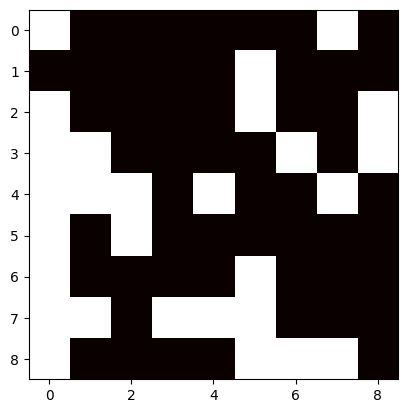

In [218]:
k = 9
results = np.random.random((k, k))

for i in range(k):
    for j in range(k):
        results[i, j] = -judge_returner(MigrationWithHeuristic(8), HeuristicAlphaBeta(i), HeuristicAlphaBeta(j))

plt.imshow(results, cmap='hot', interpolation='nearest');